**1. What are the main benefits of creating a computation graph rather than directly executing the computations? What are the main drawbacks?**

Creating the computation graph allows lazy evaluation. This can result in more efficient computation by knowing the whole graph rather than eager evaluation.

The major drawback is that the whole graph has to be created and run instead of being able to evaluate the different transformations to the data as you go. This can make debugging difficult...

**2. Is the statement `a_val = a.eval(session=sess)` equivalent to `a_val = sess.run(a)`?**

These statements should result in the same

**3. Is the statement `a_val, b_val = a.eval(session=sess), b.eval(session=sess)` equivalent to `a_val, b_val = sess.run([a, b])`?**

The results of these statements are equivalent, however the first will evaluate `a` and then `b` completely independently. The second will run `a` and `b` together in one traversal of the graph so this will be more efficient if theres a dependency between the two variables

**4. Can you run two graphs in the same session?**

In [2]:
import tensorflow as tf

x1 = tf.Variable(1)

graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)
    
init = tf.global_variables_initializer()  # prepare an init node

with tf.Session() as sess:
    init.run()  # actually initialize all the variables
    result1 = x1.eval()
    result2 = x2.eval()

ValueError: Cannot use the default session to evaluate tensor: the tensor's graph is different from the session's graph. Pass an explicit session to `eval(session=sess)`.

**5. If you create a graph `g` containing a variable `w`, then start two threads and open a session in each thread, both using the same graph `g`, will each session have its own copy of the variable w or will it be shared?**

**6. When is a variable initialized? When is it destroyed?**

After calling the global initialize method and it's destroyed after the session is closed

**7. What is the difference between a placeholder and a variable?**

A placeholder is used to feed training data and no value is needed to initialize it. A variable on the other hand requires initialization and in general corresponds to learnable weights/biases that are updated over the course of training.

**8. What happens when you run the graph to evaluate an operation that depends on a placeholder but you don’t feed its value? What happens if the operation does not depend on the placeholder?**


In [3]:
A = tf.placeholder(tf.float32, shape=(None, 3))
B = A + 5
w = tf.constant(3)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    sess.run(B)


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [?,3]
	 [[node Placeholder (defined at <ipython-input-3-83f9d9fd70c7>:1)  = Placeholder[dtype=DT_FLOAT, shape=[?,3], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder', defined at:
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2843, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2869, in _run_cell
    return runner(coro)
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3044, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3209, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-83f9d9fd70c7>", line 1, in <module>
    A = tf.placeholder(tf.float32, shape=(None, 3))
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1747, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 5206, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/Users/chaaland/miniconda3/envs/HandsOnML/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [?,3]
	 [[node Placeholder (defined at <ipython-input-3-83f9d9fd70c7>:1)  = Placeholder[dtype=DT_FLOAT, shape=[?,3], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


**9.When you run a graph, can you feed the output value of any operation, or just the value of placeholders?**

You can feed the output of _any_ operation, not only placeholders. As an example see the code below

In [6]:
A = tf.constant(3)
B = A + 5

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    Bval1 = sess.run(B, feed_dict={B: 5})
    Bval2 = sess.run(B, feed_dict={B: -1.5})

print(Bval)
print(Bval2)

5
-1


**10. How can you set a variable to any value you want (during the execution phase)?**

The `tf.assign` function allows setting of variables during execution

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from datetime import datetime

%matplotlib notebook

In [2]:
n_train = 500
n_validation = 200
X_data, y_data = make_moons(n_train + n_validation, noise=0.1)

X_linear_train, X_linear_validate, y_train, y_validate = train_test_split(X_data, y_data, test_size=n_validation, random_state=0)
_, d = X_linear_train.shape
y_train.reshape((-1,1))
y_validate.reshape((-1,1))

X_quadratic_data = np.hstack(
    [
        X_data, 
        X_data ** 2, 
        X_data.prod(axis=1, keepdims=True)
    ]
)

X_cubic_data = np.hstack(
    [
        X_data, 
        X_data ** 2, 
        X_data.prod(axis=1, keepdims=True),
        X_data[:,0:1] ** 2 * X_data[:,1:2], 
        X_data[:,1:2]**2 * X_data[:,0:1], 
        X_data ** 3
    ]
)

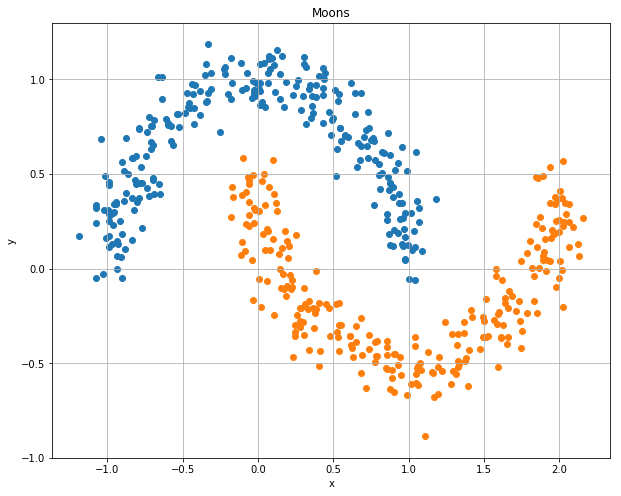

In [3]:
x_pos = X_linear_train[y_train == 0]
x_neg = X_linear_train[y_train == 1]
y_train = y_train.reshape((-1,1))
y_validate = y_validate.reshape((-1,1))

plt.figure(figsize=(10,8))
plt.scatter(x_pos[:,0], x_pos[:,1])
plt.scatter(x_neg[:,0], x_neg[:,1])

plt.title("Moons");
plt.xlabel("x");
plt.ylabel("y");
plt.grid(True);

In [4]:
def logistic_regression(X, y, d, weight_decay=0, lr=0.001):  
    """Trains a logistic regression classifier using TensorFlow
    
    :param X: placeholder variable for holding the design matrix
    :param y: placeholder variable for holding the response vector
    """
    with tf.variable_scope("model", reuse=tf.AUTO_REUSE):
        theta_init = tf.random_uniform([d, 1], -1.0, 1.0)
        theta = tf.get_variable("theta", initializer=theta_init)        
        b = tf.get_variable("bias", shape=(),initializer=tf.constant_initializer(0.0))
        logits = tf.add(tf.matmul(X, theta), b, name="logits")

    with tf.variable_scope("metrics", reuse=tf.AUTO_REUSE):
        binary_xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)
        reg_loss = tf.nn.l2_loss(theta, name="regularization")
        data_loss = tf.reduce_mean(binary_xentropy, name="data_loss")
        y_proba = tf.sigmoid(logits, name="prob")

    with tf.variable_scope("train", reuse=tf.AUTO_REUSE):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
        training_op = optimizer.minimize(data_loss + weight_decay * reg_loss)
        
    with tf.variable_scope("save", reuse=tf.AUTO_REUSE):
        saver = tf.train.Saver(name="saver")
        
    data_loss_summary = tf.summary.scalar("data_loss_summary", data_loss)

    return saver, training_op, y_proba, data_loss, reg_loss, data_loss_summary
        

def fetch_batch(X, indices, batch_index, batch_size):
    """Get a minibatch of data
    
    :param X:
    :param indices:
    :param batch_index:
    :param batch_size:
    """
    n = len(indices)
    start_index = batch_size * batch_index
    end_index = np.clip(start_index + batch_size, a_min=None, a_max=n)
    minibatch_indices = indices[start_index:end_index]
    X_batch = X[minibatch_indices,:]
    
    return X_batch

In [5]:
# some setup of variables and folder structures
now_str = datetime.utcnow().strftime("%Y%m%d%H%M%S")

model_dir = os.path.join(".", "model_checkpoints")
root_logdir = os.path.join(".", "tf_logs")
train_dir = os.path.join(root_logdir, "train", "linear", f"run-{now_str}")
test_dir = os.path.join(root_logdir, "test", "linear", f"run-{now_str}")
logistic_linear_checkpoint_file = os.path.join(model_dir, "chapter9_logistic_linear.ckpt")

os.makedirs(model_dir, exist_ok=True)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

batch_sz = 75

n_epochs = 2000
log_every = 10
learning_rate = 0.01
weight_decay = 0.

In [6]:
def train_logistic_classifier(
    X_train, 
    y_train, 
    X_validate, 
    y_validate, 
    weight_decay=0, 
    learning_rate=0.001, 
    batch_sz=32, 
    ckpt_file="",
):
    """
    :param X_train: training features
    :param y_train: training target output
    :param X_validate: validation features
    :param y_validate: validation target output
    :param weight_decay: regularization weight
    :param learning_rate: gradient multiplier in SGD
    :param batch_sz: number of examples to use in SGD
    :param ckpt_file: file to store the model during training
    """
    tf.reset_default_graph()
    n_train, d = X_train.shape
    n_validate, _ = X_validate.shape
    n_train_batches = int(np.ceil(n_train / batch_sz))
    
    X = tf.placeholder(tf.float32, shape=(None, d), name="features")
    y = tf.placeholder(tf.float32, shape=(None, 1), name="labels")
    saver, training_op, y_proba, data_loss, reg_loss, data_loss_summary = logistic_regression(X, y, d, weight_decay, learning_rate)
    train_writer = tf.summary.FileWriter(train_dir, tf.get_default_graph())
    test_writer = tf.summary.FileWriter(test_dir, tf.get_default_graph())
    
    with tf.Session() as sess:
        try:
            saver.restore(sess, ckpt_file)
        except:
            sess.run([tf.global_variables_initializer(), tf.local_variables_initializer()])
        train_indices = np.arange(n_train)
        validation_indices = np.arange(n_validation)

        for epoch in range(n_epochs):
            np.random.shuffle(train_indices)
            for batch_index in range(n_train_batches):
                X_train_batch = fetch_batch(X_train, train_indices, batch_index, batch_sz)
                y_train_batch = fetch_batch(y_train, train_indices, batch_index, batch_sz)
                sess.run(training_op, feed_dict={X: X_train_batch, y: y_train_batch})

            if epoch % log_every == 0:
                np.random.shuffle(validation_indices)
                X_validation_batch = fetch_batch(X_validate, validation_indices, 0, batch_sz)
                y_validation_batch = fetch_batch(y_validate, validation_indices, 0, batch_sz)

                train_loss = sess.run(data_loss_summary, feed_dict={X: X_train_batch, y: y_train_batch})
                validation_loss = sess.run(data_loss_summary, feed_dict={X: X_validation_batch, y: y_validation_batch})
                train_writer.add_summary(train_loss, epoch)
                test_writer.add_summary(validation_loss, epoch)
                save_path = saver.save(sess, ckpt_file)

        save_path = saver.save(sess, ckpt_file)
        with tf.variable_scope("model", reuse=tf.AUTO_REUSE):
            optimal_theta, optimal_bias = sess.run([tf.get_variable("theta"), tf.get_variable("bias")])  
            return optimal_theta, optimal_bias


In [7]:
def predict(X, model_file):
    """
    :param X:
    :param model_file:
    """
    n_eval = X.shape[0]
    batch_sz = 32
    n_eval_batches = int(np.ceil(n_eval / batch_sz))
    z = []
    session_conf = tf.ConfigProto(log_device_placement=False)
    graph = tf.Graph()

    with graph.as_default():
        sess = tf.Session(config=session_conf)
        with sess.as_default():
            saver = tf.train.import_meta_graph(f"{model_file}.meta")
            saver.restore(sess, model_file)
            indices = np.arange(n_eval)

            for batch_index in range(n_eval_batches):
                x_batch = fetch_batch(X, indices, batch_index, batch_sz)

                features = tf.get_default_graph().get_tensor_by_name("features:0")
                y_proba = tf.get_default_graph().get_tensor_by_name("metrics/prob:0")
                prob = y_proba.eval(feed_dict={features: x_batch})  
                z.append(prob.squeeze())

    return np.hstack(z)

In [8]:
theta, b = train_logistic_classifier(
    X_linear_train, 
    y_train, 
    X_linear_validate, 
    y_validate,
    weight_decay, 
    learning_rate, 
    batch_sz, 
    logistic_linear_checkpoint_file,
)

In [9]:
x_plot_points = np.linspace(-1.5, 2.5, 100)
y_plot_points = np.linspace(-2, 2, 100)

X_plot, Y_plot = np.meshgrid(x_plot_points, y_plot_points)

linear_design_matrix = np.hstack([X_plot.reshape(-1,1), Y_plot.reshape(-1,1)])
z = predict(linear_design_matrix, logistic_linear_checkpoint_file)
Z_plot = z.reshape(X_plot.shape)

INFO:tensorflow:Restoring parameters from ./model_checkpoints/chapter9_logistic_linear.ckpt


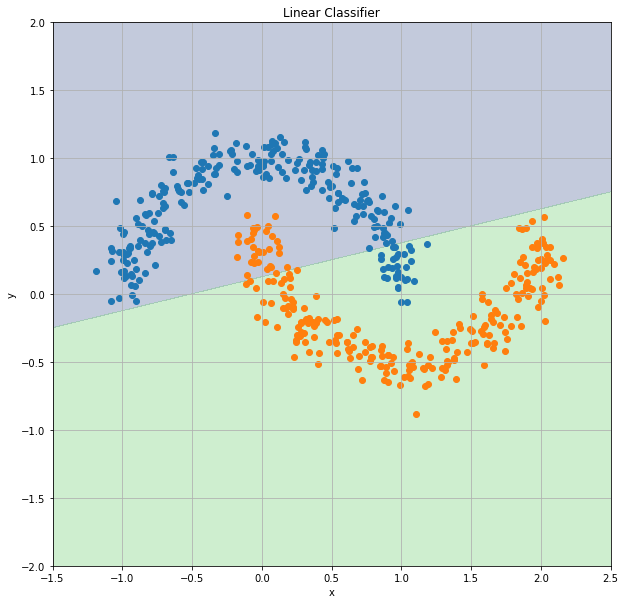

In [10]:
plt.figure(figsize=(10,10))

plt.xlabel("x");
plt.ylabel("y");
plt.title("Linear Classifier");
plt.contourf(X_plot, Y_plot, Z_plot, levels=[0, 0.5, 1.0], alpha=0.3);

plt.scatter(x_pos[:,0], x_pos[:,1]);
plt.scatter(x_neg[:,0], x_neg[:,1]);

plt.grid(True);

## Quadratic Features

In [11]:
X_quadratic_train, X_quadratic_validate, _, _ = train_test_split(X_quadratic_data, y_data, test_size=n_validation, random_state=0)
_, d = X_quadratic_train.shape

# some setup of variables and folder structures
now_str = datetime.utcnow().strftime("%Y%m%d%H%M%S")

model_dir = os.path.join(".", "model_checkpoints")
root_logdir = os.path.join(".", "tf_logs")
train_dir = os.path.join(root_logdir, "train", "quadratic", f"run-{now_str}")
test_dir = os.path.join(root_logdir, "test", "quadratic", f"run-{now_str}")

os.makedirs(model_dir, exist_ok=True)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

batch_sz = 75

n_epochs = 2000
log_every = 10
learning_rate = 0.005
weight_decay = 0.01

logistic_quad_checkpoint_file = os.path.join(model_dir, "chapter9_logistic_quad.ckpt")

In [12]:
theta, b = train_logistic_classifier(
    X_quadratic_train, 
    y_train, 
    X_quadratic_validate, 
    y_validate,
    weight_decay, 
    learning_rate, 
    batch_sz, 
    logistic_quad_checkpoint_file
)

In [13]:
x_plot_points = np.linspace(-1.5, 2.5, 100)
y_plot_points = np.linspace(-2, 2, 100)

X_plot, Y_plot = np.meshgrid(x_plot_points, y_plot_points)
X_quadratic_plot = np.hstack(
    [
        X_plot.reshape(-1,1),
        Y_plot.reshape(-1,1),
        X_plot.reshape(-1,1) ** 2,
        Y_plot.reshape(-1,1) ** 2,
        X_plot.reshape(-1,1) * Y_plot.reshape(-1,1),
    ]
)

z = predict(X_quadratic_plot, logistic_quad_checkpoint_file)
Z_plot = z.reshape(X_plot.shape)

INFO:tensorflow:Restoring parameters from ./model_checkpoints/chapter9_logistic_quad.ckpt


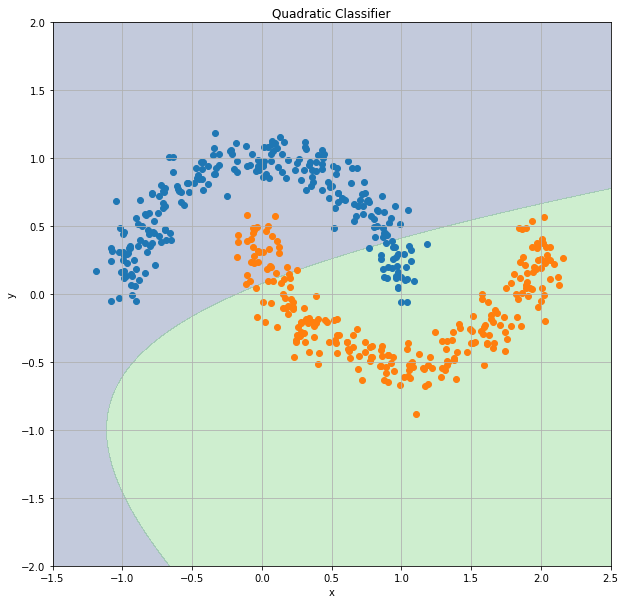

In [14]:
plt.figure(figsize=(10,10))

plt.xlabel("x")
plt.ylabel("y")
plt.title("Quadratic Classifier")
plt.contourf(X_plot, Y_plot, Z_plot, levels=[0, 0.5, 1.0], alpha=0.3)

plt.scatter(x_pos[:,0], x_pos[:,1])
plt.scatter(x_neg[:,0], x_neg[:,1])

plt.grid(True);

## Cubic Features

In [15]:
X_cubic_train, X_cubic_validate, _, _ = train_test_split(X_cubic_data, y_data, test_size=n_validation, random_state=0)
_, d = X_cubic_train.shape

# some setup of variables and folder structures
now_str = datetime.utcnow().strftime("%Y%m%d%H%M%S")

model_dir = os.path.join(".", "model_checkpoints")
root_logdir = os.path.join(".", "tf_logs")
train_dir = os.path.join(root_logdir, "train", "cubic", f"run-{now_str}")
test_dir = os.path.join(root_logdir, "test", "cubic", f"run-{now_str}")

os.makedirs(model_dir, exist_ok=True)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

batch_sz = 75

n_epochs = 2000
log_every = 10
learning_rate = 0.005
weight_decay = 0.01

logistic_cubic_checkpoint_file = os.path.join(model_dir, "chapter9_logistic_cubic.ckpt")

In [16]:
theta, b = train_logistic_classifier(
    X_cubic_train, 
    y_train, 
    X_cubic_validate, 
    y_validate,
    weight_decay, 
    learning_rate, 
    batch_sz, 
    logistic_cubic_checkpoint_file
)

In [17]:
x_plot_points = np.linspace(-1.5, 2.5, 200)
y_plot_points = np.linspace(-2, 2, 200)

X_plot, Y_plot = np.meshgrid(x_plot_points, y_plot_points)
X_cubic_plot = np.hstack(
    [
        X_plot.reshape(-1,1),
        Y_plot.reshape(-1,1),
        X_plot.reshape(-1,1) ** 2,
        Y_plot.reshape(-1,1) ** 2,
        X_plot.reshape(-1,1) * Y_plot.reshape(-1,1),
        X_plot.reshape(-1,1)** 2 * Y_plot.reshape(-1,1),
        X_plot.reshape(-1,1) * Y_plot.reshape(-1,1)**2,
        X_plot.reshape(-1,1)**3,
        Y_plot.reshape(-1,1)**3,
    ]
)

n_eval = X_plot.size
n_eval_batches = int(np.ceil(n_eval / batch_sz))
z = []

z = predict(X_cubic_plot, logistic_cubic_checkpoint_file)
Z_plot = z.reshape(X_plot.shape)

INFO:tensorflow:Restoring parameters from ./model_checkpoints/chapter9_logistic_cubic.ckpt


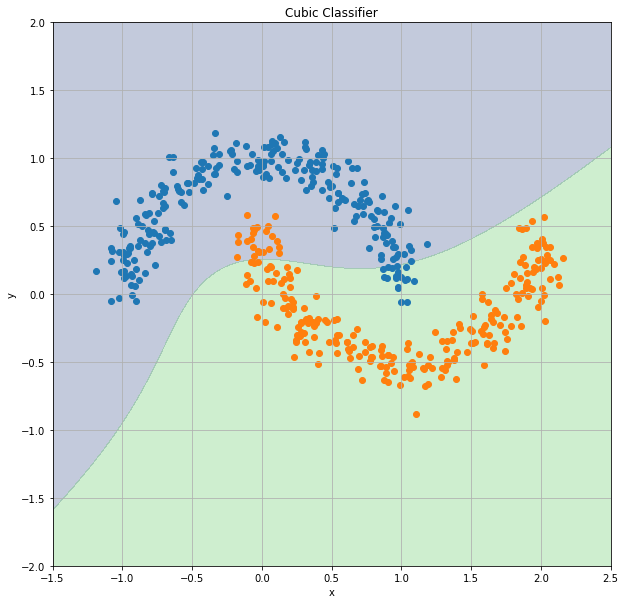

In [18]:
plt.figure(figsize=(10,10))

plt.xlabel("x")
plt.ylabel("y")
plt.title("Cubic Classifier")
plt.contourf(X_plot, Y_plot, Z_plot, levels=[0,0.5, 1.0], alpha=0.3)

plt.scatter(x_pos[:,0], x_pos[:,1])
plt.scatter(x_neg[:,0], x_neg[:,1])

plt.grid(True);

INFO:tensorflow:Restoring parameters from ./model_checkpoints/chapter9_logistic_linear.ckpt
INFO:tensorflow:Restoring parameters from ./model_checkpoints/chapter9_logistic_quad.ckpt
INFO:tensorflow:Restoring parameters from ./model_checkpoints/chapter9_logistic_cubic.ckpt


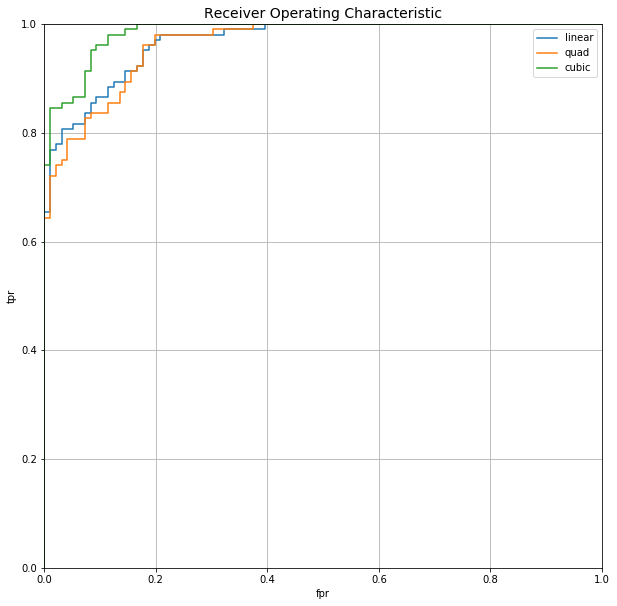

In [19]:
y_score_linear = predict(X_linear_validate, logistic_linear_checkpoint_file)
y_score_quadratic = predict(X_quadratic_validate, logistic_quad_checkpoint_file)
y_score_cubic = predict(X_cubic_validate, logistic_cubic_checkpoint_file)

fpr_linear, tpr_linear, _ = roc_curve(y_validate.squeeze(), y_score_linear.squeeze())
fpr_quadratic, tpr_quadratic, _ = roc_curve(y_validate.squeeze(), y_score_quadratic.squeeze())
fpr_cubic, tpr_cubic, _ = roc_curve(y_validate.squeeze(), y_score_cubic.squeeze())

plt.figure(figsize=(10,10))

plt.xlabel("x");
plt.ylabel("y");
plt.title("Receiver Operating Characteristic", fontsize=14);
plt.xlabel("fpr");
plt.ylabel("tpr");

plt.step(fpr_linear, tpr_linear, label="linear");
plt.step(fpr_quadratic, tpr_quadratic, label="quad");
plt.step(fpr_cubic, tpr_cubic, label="cubic");

plt.xlim(0,1);
plt.ylim(0,1);
plt.grid(True);
plt.legend();